<a href="https://colab.research.google.com/github/bobs24/Data-Science-Learning-Path/blob/Learning/Missing_Values_%26_Boxplot(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal 1. Menentukan jenis data categorical atau numeric
Jelaskan data kategorikal (kualitatif) dan data numerik (kuantitatif)



Jawab disini:

Kategorikal = Nominal dan ordinal, nominal tidak memiliki urutan/hierarchy sedangkan ordinal memiliki urutan/hierarchy

numerik = bentuk diskrit (angka bulat), kontinyu (waktu berkesinambungan), ratio, dan juga interval 

---



---



---



Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=19Yc404D3U3OPPoUP8J1pXETlTmA4hOOX)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df6=pd.read_csv('austin_weather.csv',na_values=['na','-'])

In [ ]:
Dew = df6['DewPointAvgF']
Dew.unique()

array([49., 36., 27., 28., 40., 39., 41., 26., 42., 22., 48., 32.,  8.,
       11., 45., 55., 61., 37., 47., 25., 23., 20., 33., 30., 29., 17.,
       14., 13., 54., 59., 15., 24., 34., 35., 57., 50., 53., 60., 46.,
       56., 51., 31., 38., 62., 43., 63., 64., 67., 66., 58., 70., 68.,
       65., 69., 71., 72., nan, 73., 74., 21., 44., 52., 12., 75., 76.,
       18.])

In [ ]:
Dew.value_counts()

71.0    84
72.0    74
73.0    71
70.0    57
69.0    54
        ..
13.0     2
21.0     1
8.0      1
18.0     1
14.0     1
Name: DewPointAvgF, Length: 65, dtype: int64

In [ ]:
Dew_Missing_Percentage = ((Dew.isnull().sum())/len(Dew))*100
Dew_Missing_Percentage

0.8339651250947688

In [ ]:
df = df.sample(1000)

<h2>Soal 2. Visualisasi Scatter Plot dengan memiliki missing value </h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' dan 'na' yang dianggap sebagai missing value,  namun data ini tidak bisa di ubah ke bentuk float, maka ubahlah data tersebut menjadi NaN dengan menambahkan argumen na_values=['na', '-'] saat menggunakan atribut pd.read_csv('nama file.csv'. na_values=..]
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

a. Buahlah visualisasi scatter plot menggunakan sample(1000), sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


b. Kemudian bandingkan data visualisasi diatas dengan visualisasi data (sample=1000) setelah handling missing value menggunakan:
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

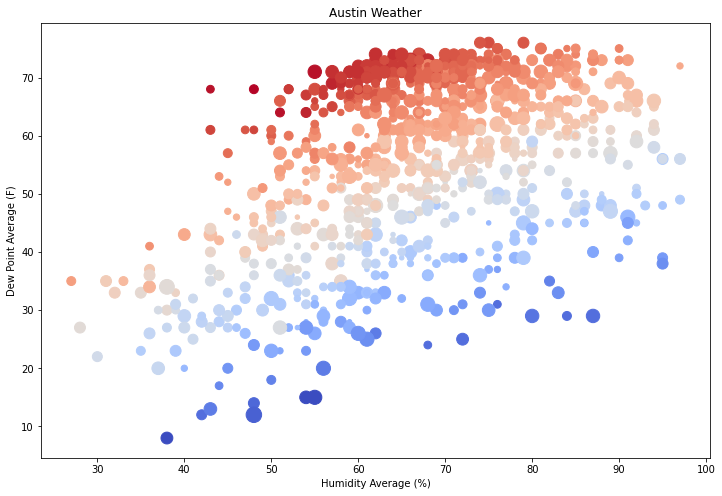

In [ ]:
df2=pd.read_csv('austin_weather.csv', na_values=['na','-'])
df2.astype({'DewPointAvgF':'float','HumidityAvgPercent':'float','WindAvgMPH':'float'}).dtypes
df3=df2.sample(1000)
plt.figure(figsize=(12,8))
plt.scatter(df3['HumidityAvgPercent'],df3['DewPointAvgF'],cmap='coolwarm',c=df3['TempAvgF'],s=df3['WindAvgMPH']*20)
plt.xlabel('Humidity Average (%)')
plt.ylabel('Dew Point Average (F)')
plt.title('Austin Weather')
plt.show()

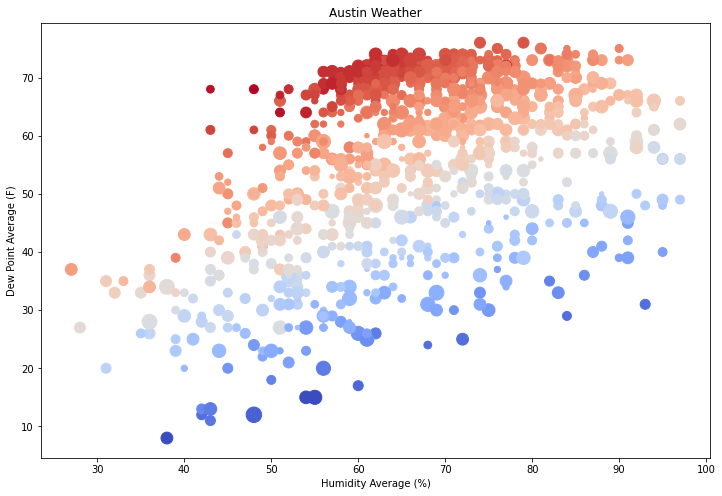

In [ ]:
df4=df2.fillna(method='ffill').sample(1000)
plt.figure(figsize=(12,8))
plt.scatter(df4['HumidityAvgPercent'],df4['DewPointAvgF'],cmap='coolwarm',c=df4['TempAvgF'],s=df4['WindAvgMPH']*20)
plt.xlabel('Humidity Average (%)')
plt.ylabel('Dew Point Average (F)')
plt.title('Austin Weather')
plt.show()

#                     **Expected output**

#                     **Tanpa Handling missing value**

![tanpa handling missing value](https://drive.google.com/uc?id=1FYJkCwAfm8f3jyNdzOnCvp15hS_DixHr)

##                    **Dengan Handling missing value**
![dengan handling missing value](https://drive.google.com/uc?id=1nqZuPdBsqSsOud-_XuBGujDAcJWEEvIr)

Analisa : 

Download [price.csv](https://drive.google.com/uc?export=download&id=1LfuQmLb8AZxAvJzgWJ3u4h49EoTGqO-R)

In [ ]:
df2 = pd.read_csv('price.csv')
df2['House_Price']

0      6649000
1      3982000
2      5401000
3      5373000
4      4662000
        ...   
931    5434000
932    7062000
933    7227000
934    7062000
935    7062000
Name: House_Price, Length: 936, dtype: int64

---

<h2>Soal 3. Visualisasi Data with Handling outliers </h2>

Pada tugas kali ini, kita akan melakukan handling outliers. Outliers ditemukan pada kolom 'House_Price' dengan menggunakan boxplot dari library seaborn seperti gambar berikut: 


![boxplot1](https://drive.google.com/uc?id=1y2jRwf8zRPXQtSBkmjJLcqUm4l6DR7d9)


Dengan menggunakan Interquartile range, kita bisa temukan nilai data outliers dan meremove data outlier tersebut. 

*   Tentukan nilai batas atas dan batas bawah dari Interquartile range tersebut
*   Remove data outliers tersebut menggunakan batas atas dan batas bawah
*   Visualisasikan hasil data yang sudah d remove outliers seperti expected berikut:







**EXPECTED OUTPUT:**

Batas bawah & batas atas:

871625.0 10976625.0

Visualisasi boxplot:

![boxplot2](https://drive.google.com/uc?id=1qZc-lEa5FUzSQ_cyt4_GJQ0TZ8c6WjHX)





In [ ]:
#Code here
import seaborn as sns
q1 = df2['House_Price'].quantile(0.25)
q3 = df2['House_Price'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (iqr*1.5)
upper_bound = q3 + (iqr*1.5)

print(lower_bound,upper_bound)

871625.0 10976625.0


In [ ]:
def outliers(x):
  lower_bound,upper_bound=lower_upper_bound(x)
  return x[np.where((x > upper_bound) | (x < lower_bound))]

outliers(df2['House_Price'].values)

array([150000000,  11632000,     30000])

In [ ]:
DF3 =df2[ (df2['House_Price']<upper_bound) & (df2['House_Price']>lower_bound) ]
DF3['House_Price']

0      6649000
1      3982000
2      5401000
3      5373000
4      4662000
        ...   
931    5434000
932    7062000
933    7227000
934    7062000
935    7062000
Name: House_Price, Length: 933, dtype: int64

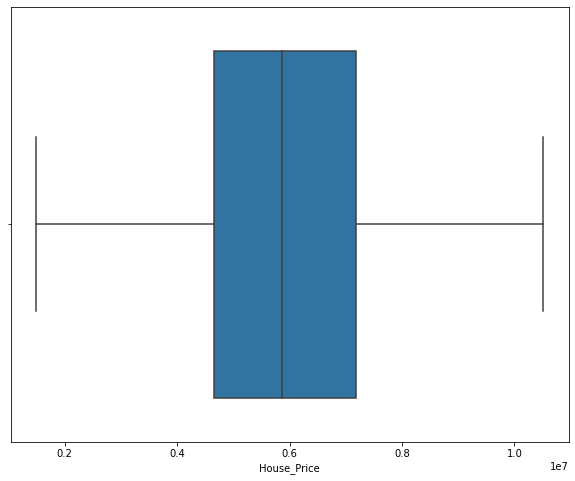

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="House_Price",data = DF3)